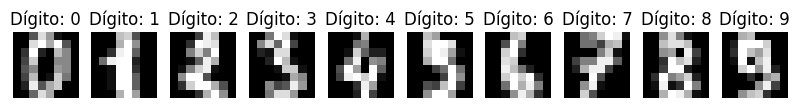

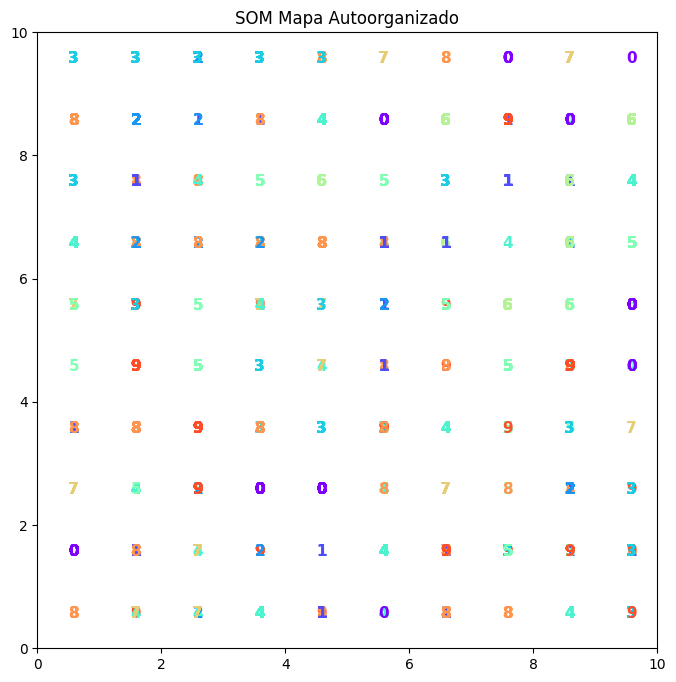

In [14]:
from minisom import MiniSom
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# Número de dígitos 
n_digits = 10

plt.figure(figsize=(10, 2))

# Mostrar imágenes de los dígitos
for i in range(n_digits):
    plt.subplot(1, n_digits, i + 1)  
    plt.imshow(digits.images[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f'Dígito: {digits.target[i]}')  # Título con el dígito correspondiente
    plt.axis('off')  

plt.show()

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar SOM
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)

# Entrenar SOM
som.train_random(X_scaled, 100)

# Visualizar resultados del SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Obtener la neurona ganadora
    plt.text(w[0] + 0.5, w[1] + 0.5, str(digits.target[i]), 
             color=plt.cm.rainbow(digits.target[i] / 10.), 
             fontdict={'weight': 'bold', 'size': 11})

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("SOM Mapa Autoorganizado")
plt.show()




La neurona ganadora para el dígito de prueba es: (3, 2)


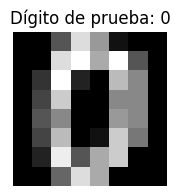



La neurona corresponde al dígito



In [16]:
# Comprobamos la clasificación

# Por ejemplo, usamos el 0
test_digit = digits.data[0].reshape(1, -1)

# Normalizar el dígito de prueba
test_digit_scaled = scaler.transform(test_digit)

# Obtener la neurona ganadora para el dígito de prueba
winner_neuron = som.winner(test_digit_scaled[0])
print(f"La neurona ganadora para el dígito de prueba es: {winner_neuron}")

# Visualizar el dígito de objetivo
plt.figure(figsize=(2, 2))
plt.imshow(test_digit.reshape(8, 8), cmap='gray')
plt.title(f'Dígito de prueba: {digits.target[0]}')
plt.axis('off')  # No mostrar los ejes
plt.show()

print("\n\nLa neurona corresponde al dígito\n")